<a href="https://colab.research.google.com/github/jimtoberfest/eVTOL/blob/main/Electric_aircraft_range_explorations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def electric_range(eff_motor, eff_prop, ld, e_batt, w_batt, w_oe, w_pl, g=9.81, eff_batt = .7):
    '''
    Equation based on Breguet Range Equation, modified for electric propulsion.
    
    Constants:
    Gravity(g) based on earth, but no reason other celestial bodies could not be simulated such as:
         Mars, Titan, Venus, etc...
    eff_bat represents the real life usable percentage of a battery powered system with longevity in mind,
         this is based off a simple hueristic of EV car owners and multicopter experience.

    '''



    eff_propulsion = eff_motor * eff_prop
    batt_j = e_batt * 3600
    mass_frac = ((w_batt * g) / ((w_oe * g) + (w_pl * g) + (w_batt * g)))
    total_weight = (w_batt + w_oe + w_pl)
    batt_factor = batt_j / g
    
    y = eff_propulsion * ld * (batt_j / g) * mass_frac
    y = y / 1000
    
    x = eff_motor * eff_prop * ld * ((e_batt * 3600)/g) * (w_batt / (w_oe + w_pl + w_batt))
    x = x / 1000
    
    y_miles = y * .621
    y_miles_real = y_miles * eff_batt
    
    return y_miles_real
    
#     return y_miles_real, y_miles , x, y, eff_propulsion, batt_j, mass_frac, total_weight, batt_factor

# Joby Aircraft as a test exploration

(886.3636363636363, 214.17150550458715, 2272.7272727272725, 0.39, 199.43181818181816) 

batt_mass:  886.36
Range (mi):  214.17
Gross_wt (kg):  2272.73
Batt_mass_fraction:  0.39
batt_kWh:  199.43


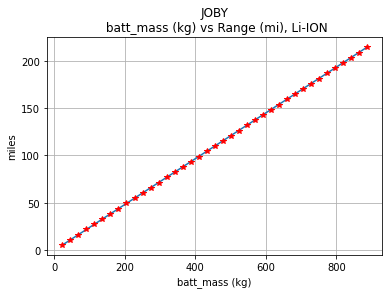

In [3]:
#JOBY, Mass fractions exploration

fractions = np.arange(.01, .40, .01)

e_m = .9
e_p = .85
ld = 20
e_batt = 225
payload = (100 * 5)

MTOW = (5000/2.2) #5,000 lbs to KG

w_test1 = MTOW * fractions[0]

ranges = []

for fraction in fractions:
    w_batt = MTOW * fraction
    w_empty = MTOW - payload - w_batt

    y = electric_range(e_m, e_p, ld, e_batt, w_batt, w_empty, payload)
    
    ranges.append((w_batt, y, (w_empty + w_batt + payload), fraction, (w_batt * e_batt) / 1000))

print(ranges[-1],"\n")

x_val  = [x[0] for x in ranges]
y_val  = [x[1] for x in ranges]
y2_val = [x[2] for x in ranges]

plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'*r')
plt.title('JOBY\n batt_mass (kg) vs Range (mi), Li-ION')
plt.ylabel('miles')
plt.xlabel('batt_mass (kg)')
plt.grid()

labels = ['batt_mass: ', 'Range (mi): ', 'Gross_wt (kg): ', 'Batt_mass_fraction: ', 'batt_kWh: ']

for x in range(len(labels)):
    print(labels[x],(f"{ranges[-1][x]:.2f}"))


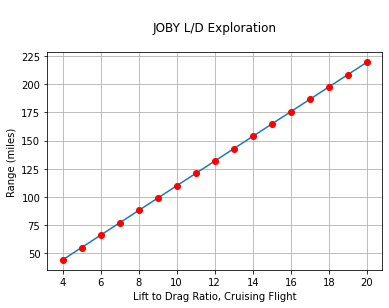

In [4]:
# JOBY 2, L/D Exploration


ld_s = np.arange(4, 21, 1)



e_m = .9
e_p = .85
ld = 20
e_batt = 225
payload = (100 * 5)

MTOW = (5000/2.2) #5,000 lbs to KG

w_test1 = MTOW * fractions[0]

w_batt = MTOW * .4
w_empty = MTOW - payload - w_batt

ranges = []

for i in ld_s:
    y = electric_range(e_m, e_p, i, e_batt, w_batt, w_empty, payload)

    ranges.append((i, y))
ld_s

x_val = [x[0] for x in ranges]
y_val = [x[1] for x in ranges]


plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'or')
plt.title("\nJOBY L/D Exploration\n")
plt.xlabel("Lift to Drag Ratio, Cruising Flight")
plt.ylabel("Range (miles)")
plt.grid()

# Microlights, Theoretical Electric Conversions

(34.70550000000001, 45.024212635035866, 218.7055, 0.15000000000000002, 5.205825000000001) 

batt_mass:  34.71
Range (mi):  45.02
Gross_wt (kg):  218.71
Batt_mass_fraction:  0.15
batt_kWh:  5.21


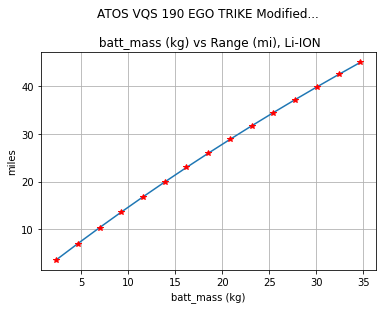

In [5]:
# ATOS VQS 190 EGO TRIKE Modified...

'''
based on data from youtube video:  https://www.youtube.com/watch?v=0lg_3rU3K7M

L/D moved down to 13 (from 16), climb L/D must be signifigantly below the max L/D and 
    the cruise speed is likely too low and/or the wing is too large for efficient cruise owing to the
    fact the primary purpose is for termalling

total batt_weight available is 34kg but it limits pilot weight to 95kg
    seems to be Li-po batteries (150 wh/kg) circe 2016 and total range is 70km (~44mi).
    100 min batter endurace @ cruise speed of 70 kph.
    
Switch to Li-Ion chemistry (225 wh/kg) would seemingly increase range 50% to ~70 miles...

23 mph stall speed

'''


fractions = np.arange(.01, .40, .01)

e_m = .9
e_p = .85
ld = 15.5
e_batt = 150
payload = (96)

MTOW = (231.37) #5,000 lbs to KG

w_test1 = MTOW * fractions[0]

ranges = []

for fraction in fractions:
    w_batt = MTOW * fraction
    w_empty = 45 + 43  #wing weight + trike empty weight, no batteries

    if w_empty + w_batt + payload > (MTOW * .95):
        break
    else:
        y = electric_range(e_m, e_p, ld, e_batt, w_batt, w_empty, payload)
    
        ranges.append((w_batt, y, (w_empty + w_batt + payload), fraction, (w_batt * e_batt) / 1000))

print(ranges[-1],"\n")

x_val  = [x[0] for x in ranges]
y_val  = [x[1] for x in ranges]
y2_val = [x[2] for x in ranges]

plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'*r')
plt.title('ATOS VQS 190 EGO TRIKE Modified...\n\n batt_mass (kg) vs Range (mi), Li-ION')
plt.ylabel('miles')
plt.xlabel('batt_mass (kg)')
plt.grid()

labels = ['batt_mass: ', 'Range (mi): ', 'Gross_wt (kg): ', 'Batt_mass_fraction: ', 'batt_kWh: ']

for x in range(len(labels)):
    print(labels[x],(f"{ranges[-1][x]:.2f}"))

(60.15454545454545, 55.5229708954445, 218.15454545454546, 0.26, 9.023181818181818) 

batt_mass:  60.15
Range (mi):  55.52
Gross_wt (kg):  218.15
Batt_mass_fraction:  0.26
batt_kWh:  9.02


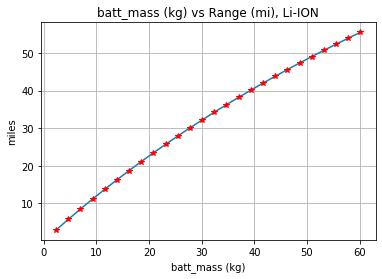

In [6]:
# Wills Wing Falcon 3 with Carbon eHelp Modified to land heavy...verified via data from:
# https://www.youtube.com/watch?v=kMv0oyVrDfs
# This wing performs admirably compared to the much higher performance ATOS due primarily to reduced mass of no trike and wing itself
# Landing with a 60 kg battery and no trike could be problematic and maybe it could be jettisoned before the landing approach to reduce risk.

fractions = np.arange(.01, .40, .01)

e_m = .9
e_p = .85
ld = 11
e_batt = 150
payload = (100)

MTOW = (509/2.2) #5,000 lbs to KG

w_test1 = MTOW * fractions[0]

ranges = []

for fraction in fractions:
    w_batt = MTOW * fraction
    w_empty = 32 + 14 + 12  #wing weight + Carbon_eHelp + harness

    if w_empty + w_batt + payload > (MTOW * .95):
        break
    else:
        y = electric_range(e_m, e_p, ld, e_batt, w_batt, w_empty, payload)
    
        ranges.append((w_batt, y, (w_empty + w_batt + payload), fraction, (w_batt * e_batt) / 1000))






x_val  = [x[0] for x in ranges]
y_val  = [x[1] for x in ranges]
y2_val = [x[2] for x in ranges]

plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'*r')
plt.title('batt_mass (kg) vs Range (mi), Li-ION')
plt.ylabel('miles')
plt.xlabel('batt_mass (kg)')
plt.grid()


print(ranges[-1],"\n")

labels = ['batt_mass: ', 'Range (mi): ', 'Gross_wt (kg): ', 'Batt_mass_fraction: ', 'batt_kWh: ']

for x in range(len(labels)):
    print(labels[x],(f"{ranges[-1][x]:.2f}"))

In [7]:
# Similar numbers to video linked above


a = ranges[1][1]
b = ranges[1][0]
print(f'Range (miles): {a:.2f}, batt_mass(kg): {b:.2f}')

Range (miles): 5.73, batt_mass(kg): 4.63


(148.20000000000002, 37.39268187077562, 290.20000000000005, 0.39, 22.230000000000004) 

batt_mass:  148.20
Range (mi):  37.39
Gross_wt (kg):  290.20
Batt_mass_fraction:  0.39
batt_kWh:  22.23


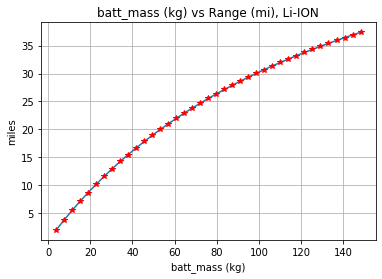

In [8]:
# Paramotor Trike with electric engine theoretical:
# Small, lightweight, tubular and fabric strap trike, commonplace in the paramotor community
# L/D numbers were hard to come by for these vehicles.  Takeoff and Landing rolls would be very long with added mass.


fractions = np.arange(.01, .40, .01)

e_m = .9
e_p = .85
ld = 4
e_batt = 150
payload = (100)

MTOW = 380 

w_test1 = MTOW * fractions[0]

ranges = []

for fraction in fractions:
    w_batt = MTOW * fraction
    w_empty = 15 + 15 + 12  #wing weight + trike weight + ePPG weight

    if w_empty + w_batt + payload > (MTOW * .95):
        break
    else:
        y = electric_range(e_m, e_p, ld, e_batt, w_batt, w_empty, payload)
    
        ranges.append((w_batt, y, (w_empty + w_batt + payload), fraction, (w_batt * e_batt) / 1000))






x_val  = [x[0] for x in ranges]
y_val  = [x[1] for x in ranges]
y2_val = [x[2] for x in ranges]

plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'*r')
plt.title('batt_mass (kg) vs Range (mi), Li-ION')
plt.ylabel('miles')
plt.xlabel('batt_mass (kg)')
plt.grid()


print(ranges[-1],"\n")

labels = ['batt_mass: ', 'Range (mi): ', 'Gross_wt (kg): ', 'Batt_mass_fraction: ', 'batt_kWh: ']

for x in range(len(labels)):
    print(labels[x],(f"{ranges[-1][x]:.2f}"))

# Existing Aircraft, Conversions to EV

572.25
(144.24, 125.89971887694396, 566.24, 0.24000000000000002, 32.454) 

batt_mass:  144.24
Range (mi):  125.90
Gross_wt (kg):  566.24
Batt_mass_fraction:  0.24
batt_kWh:  32.45


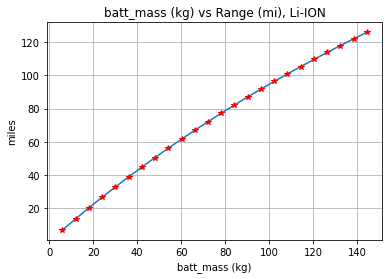

In [9]:
# Rutan Long-EZ, Mass fractions exploration, one passenger

fractions = np.arange(.01, .40, .01)

e_m = .9
e_p = .85
ld = 18
e_batt = 225
payload = (100 * 1)

MTOW = (601.0) # KG

w_test1 = MTOW * fractions[0]

ranges = []

for fraction in fractions:
    w_batt = MTOW * fraction
    w_empty = 322

    if w_empty + w_batt + payload > (MTOW * .95):
        print(w_empty + w_batt + payload)
        break
    else:
        y = electric_range(e_m, e_p, ld, e_batt, w_batt, w_empty, payload)
        ranges.append((w_batt, y, (w_empty + w_batt + payload), fraction, (w_batt * e_batt) / 1000))


x_val  = [x[0] for x in ranges]
y_val  = [x[1] for x in ranges]
y2_val = [x[2] for x in ranges]

plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'*r')
plt.title('batt_mass (kg) vs Range (mi), Li-ION')
plt.ylabel('miles')
plt.xlabel('batt_mass (kg)')
plt.grid()


print(ranges[-1],"\n")

labels = ['batt_mass: ', 'Range (mi): ', 'Gross_wt (kg): ', 'Batt_mass_fraction: ', 'batt_kWh: ']

for x in range(len(labels)):
    print(labels[x],(f"{ranges[-1][x]:.2f}"))

520.12
(119.68, 63.848599425455795, 514.6800000000001, 0.22, 26.928) 

batt_mass:  119.68
Range (mi):  63.85
Gross_wt (kg):  514.68
Batt_mass_fraction:  0.22
batt_kWh:  26.93


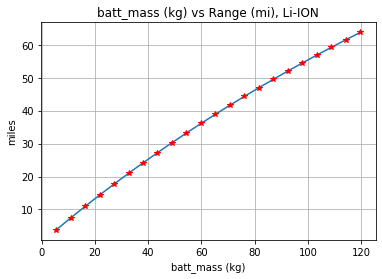

In [10]:
# Kitfox, Mass fractions exploration, one passenger

fractions = np.arange(.01, .40, .01)

e_m = .9
e_p = .85
ld = 10
e_batt = 225
payload = (100 * 1)

MTOW = (544.0) # KG

w_test1 = MTOW * fractions[0]

ranges = []

for fraction in fractions:
    w_batt = MTOW * fraction
    w_empty = 295

    if w_empty + w_batt + payload > (MTOW * .95):
        print(w_empty + w_batt + payload)
        break
    else:
        y = electric_range(e_m, e_p, ld, e_batt, w_batt, w_empty, payload)
        ranges.append((w_batt, y, (w_empty + w_batt + payload), fraction, (w_batt * e_batt) / 1000))


x_val  = [x[0] for x in ranges]
y_val  = [x[1] for x in ranges]
y2_val = [x[2] for x in ranges]

plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'*r')
plt.title('batt_mass (kg) vs Range (mi), Li-ION')
plt.ylabel('miles')
plt.xlabel('batt_mass (kg)')
plt.grid()


print(ranges[-1],"\n")

labels = ['batt_mass: ', 'Range (mi): ', 'Gross_wt (kg): ', 'Batt_mass_fraction: ', 'batt_kWh: ']

for x in range(len(labels)):
    print(labels[x],(f"{ranges[-1][x]:.2f}"))

2254.4300000000003
(231.29999999999998, 21.34745061658218, 2231.3, 0.09999999999999999, 52.04249999999999) 

batt_mass:  231.30
Range (mi):  21.35
Gross_wt (kg):  2231.30
Batt_mass_fraction:  0.10
batt_kWh:  52.04


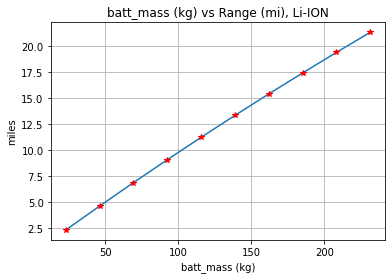

In [11]:
# Harbour Air Beaver Float Plane, Mass fractions exploration,with floats
# Could not find actual range information on these flights...need to do more searching
# Seems like potential farthest flight between bases could be 55 miles, need to do more route research


fractions = np.arange(.01, .40, .01)

e_m = .9
e_p = .85
ld = 7.5
e_batt = 225
payload = (100 * 5)

MTOW = (2313.0) # KG

w_test1 = MTOW * fractions[0]

ranges = []

for fraction in fractions:
    w_batt = MTOW * fraction
    w_empty = 1500  #KG

    if w_empty + w_batt + payload > (MTOW * .97):
        print(w_empty + w_batt + payload)
        break
    else:
        y = electric_range(e_m, e_p, ld, e_batt, w_batt, w_empty, payload)
        ranges.append((w_batt, y, (w_empty + w_batt + payload), fraction, (w_batt * e_batt) / 1000))


x_val  = [x[0] for x in ranges]
y_val  = [x[1] for x in ranges]
y2_val = [x[2] for x in ranges]

plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'*r')
plt.title('batt_mass (kg) vs Range (mi), Li-ION')
plt.ylabel('miles')
plt.xlabel('batt_mass (kg)')
plt.grid()


print(ranges[-1],"\n")

labels = ['batt_mass: ', 'Range (mi): ', 'Gross_wt (kg): ', 'Batt_mass_fraction: ', 'batt_kWh: ']

for x in range(len(labels)):
    print(labels[x],(f"{ranges[-1][x]:.2f}"))

320.5454545454545
(73.99999999999999, 38.4363175432092, 317.18181818181813, 0.22, 16.649999999999995) 

batt_mass:  74.00
Range (mi):  38.44
Gross_wt (kg):  317.18
Batt_mass_fraction:  0.22
batt_kWh:  16.65


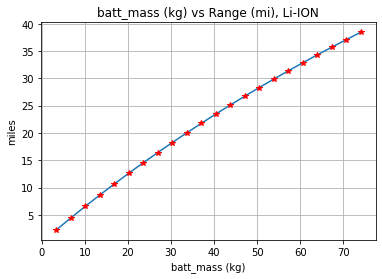

In [12]:
# Facetmobile, Mass fractions exploration
# Exploring facetmobile as it has a terrible L/D ratio but a good useful load to gross weight ratio lending to better mass fractions potentially

fractions = np.arange(.01, .40, .01)

e_m = .9
e_p = .85
ld = 6
e_batt = 225
payload = (100 * 1)

MTOW = (740.0 / 2.2) # KG

w_test1 = MTOW * fractions[0]

ranges = []

for fraction in fractions:
    w_batt = MTOW * fraction
    w_empty = (315 / 2.2)

    if w_empty + w_batt + payload > (MTOW * .95):
        print(w_empty + w_batt + payload)
        break
    else:
        y = electric_range(e_m, e_p, ld, e_batt, w_batt, w_empty, payload)
        ranges.append((w_batt, y, (w_empty + w_batt + payload), fraction, (w_batt * e_batt) / 1000))


x_val  = [x[0] for x in ranges]
y_val  = [x[1] for x in ranges]
y2_val = [x[2] for x in ranges]

plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'*r')
plt.title('batt_mass (kg) vs Range (mi), Li-ION')
plt.ylabel('miles')
plt.xlabel('batt_mass (kg)')
plt.grid()


print(ranges[-1],"\n")

labels = ['batt_mass: ', 'Range (mi): ', 'Gross_wt (kg): ', 'Batt_mass_fraction: ', 'batt_kWh: ']

for x in range(len(labels)):
    print(labels[x],(f"{ranges[-1][x]:.2f}"))

In [13]:
# Cessna 152 Conversion
# Use it to compare to the facetmobile

# Manned Multirotors

338.0
(64.6, 10.602387278799277, 334.6, 0.19, 9.69) 

batt_mass:  64.60
Range (mi):  10.60
Gross_wt (kg):  334.60
Batt_mass_fraction:  0.19
batt_kWh:  9.69


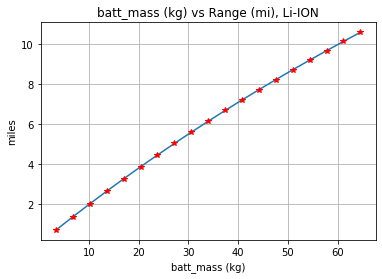

In [14]:
# Ehang 184, https://en.wikipedia.org/wiki/EHang#Ehang_184

fractions = np.arange(.01, .40, .01)

e_m = .9
e_p = .85
ld = 3  # This seems very high l/d for multicopter, real numbers probably closer to 2-3 at best
e_batt = 150
payload = (100 * 1)

MTOW = (748 / 2.2) # KG

w_test1 = MTOW * fractions[0]

ranges = []

for fraction in fractions:
    w_batt = MTOW * fraction
    w_empty = ((748/2)/2.2)  #KG

    if w_empty + w_batt + payload > (MTOW * .99):
        print(w_empty + w_batt + payload)
        break
    else:
        y = electric_range(e_m, e_p, ld, e_batt, w_batt, w_empty, payload)
        ranges.append((w_batt, y, (w_empty + w_batt + payload), fraction, (w_batt * e_batt) / 1000))


batt_mass  = [x[0] for x in ranges]
miles  = [x[1] for x in ranges]
TOW = [x[2] for x in ranges]
fractional_weight = [x[3] for x in ranges]

plt.plot(batt_mass,miles)
plt.plot(batt_mass,miles,'*r')
plt.title('batt_mass (kg) vs Range (mi), Li-ION')
plt.ylabel('miles')
plt.xlabel('batt_mass (kg)')
plt.grid()


print(ranges[-1],"\n")

labels = ['batt_mass: ', 'Range (mi): ', 'Gross_wt (kg): ', 'Batt_mass_fraction: ', 'batt_kWh: ']

for x in range(len(labels)):
    print(labels[x],(f"{ranges[-1][x]:.2f}"))

(53.550000000000004, 41.74450069072812, 228.95000000000002, 0.21000000000000002, 12.048750000000002) 

batt_mass:  53.55
Range (mi):  41.74
Gross_wt (kg):  228.95
Batt_mass_fraction:  0.21
batt_kWh:  12.05


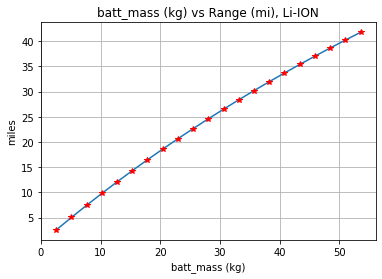

In [15]:
# BLACKFLY (Opener), https://evtol.news/opener-blackfly/
'''
Below numbers were spec'd to get 40+ mi range with 12kWh battery, makes l/D 6.5 which seems somewhat unrealistic
given the limited span.  BlackFly must benefit greatly from a psuedo blown wing effect in forward flight to greatly increase
CL while keeping drag low with such small wings.
'''


fractions = np.arange(.01, .22, .01)

e_m = .9
e_p = .85
ld = 6.5  #Slight increase in L/D due to potential for blown stub-wing aerodynamics, could be way too high, unknown
e_batt = 225  # Li-ION
payload = (113.4 * 1)

MTOW = (142 + 113)  #KG, basic calculations based on international variant.  INTL:  12 kWh batt, US: 8 kWH batt

# MTOW = (900 / 1.2) / 2.2  # advanced calculations on using a 1.25 thrust factor to maximuize range, max thrust: 900 lbs

w_test1 = MTOW * fractions[0]

ranges = []

for fraction in fractions:
    w_batt = MTOW * fraction
    w_empty = (142-80) #KG

    if w_empty + w_batt + payload > (MTOW * .955):
        print (f"MTOW: {w_empty + w_batt + payload:.2f} kg")  #  print(f"Salário do mês: R${salario:.2f}")
        break
    else:
        y = electric_range(e_m, e_p, ld, e_batt, w_batt, w_empty, payload)
        ranges.append((w_batt, y, (w_empty + w_batt + payload), fraction, (w_batt * e_batt) / 1000))


batt_mass  = [x[0] for x in ranges]
miles  = [x[1] for x in ranges]
TOW = [x[2] for x in ranges]
fractional_weight = [x[3] for x in ranges]

plt.plot(batt_mass,miles)
plt.plot(batt_mass,miles,'*r')
plt.title('batt_mass (kg) vs Range (mi), Li-ION')
plt.ylabel('miles')
plt.xlabel('batt_mass (kg)')
plt.grid()


print(ranges[-1],"\n")

labels = ['batt_mass: ', 'Range (mi): ', 'Gross_wt (kg): ', 'Batt_mass_fraction: ', 'batt_kWh: ']

for x in range(len(labels)):
    print(labels[x],(f"{ranges[-1][x]:.2f}"))

        

MTOW: 432.50 kg
(63.00000000000001, 12.125094218897368, 428.0, 0.14, 9.450000000000001) 

batt_mass:  63.00
Range (mi):  12.13
Gross_wt (kg):  428.00
Batt_mass_fraction:  0.14
batt_kWh:  9.45


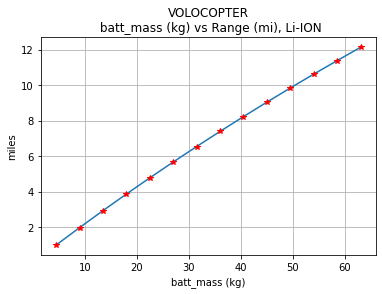

In [16]:
# VOLOCOPTER

# volocopter stated range is 17mi but according to this analysis even with a VERY generous L/D ratio that type of range comes at the 
# cost of severely draining the batteries limiting their lifespan
# Volocopter may have moved to a more favorable Li-ION batt chemistry which would again peak them at ~18 miles.
# It seems highly unlikely however they will achieve a powered L/D of 4.5, more data is needed to confirm.

fractions = np.arange(.01, .40, .01)

e_m = .9
e_p = .85
ld = 4.5  #Slight increase in L/D due to potential for blown stub-wing aerodynamics
e_batt = 150  # LIPO
payload = (100 * 2)

MTOW = (450)  #KG



w_test1 = MTOW * fractions[0]

ranges = []

for fraction in fractions:
    w_batt = MTOW * fraction
    w_empty = (165) #KG

    if w_empty + w_batt + payload > (MTOW * .955):
        print (f"MTOW: {w_empty + w_batt + payload:.2f} kg")  #  print(f"Salário do mês: R${salario:.2f}")
        break
    else:
        y = electric_range(e_m, e_p, ld, e_batt, w_batt, w_empty, payload)
        ranges.append((w_batt, y, (w_empty + w_batt + payload), fraction, (w_batt * e_batt) / 1000))


batt_mass  = [x[0] for x in ranges]
miles  = [x[1] for x in ranges]
TOW = [x[2] for x in ranges]
fractional_weight = [x[3] for x in ranges]

plt.plot(batt_mass,miles)
plt.plot(batt_mass,miles,'*r')
plt.title('VOLOCOPTER\n batt_mass (kg) vs Range (mi), Li-ION')
plt.ylabel('miles')
plt.xlabel('batt_mass (kg)')
plt.grid()


print(ranges[-1],"\n")

labels = ['batt_mass: ', 'Range (mi): ', 'Gross_wt (kg): ', 'Batt_mass_fraction: ', 'batt_kWh: ']

for x in range(len(labels)):
    print(labels[x],(f"{ranges[-1][x]:.2f}"))

        

# Lift + Cruise Designs and Tilt Motors

(1238.25, 64.25145165137616, 3175.0, 0.39, 278.60625) 

batt_mass:  1238.25
Range (mi):  64.25
Gross_wt (kg):  3175.00
Batt_mass_fraction:  0.39
batt_kWh:  278.61


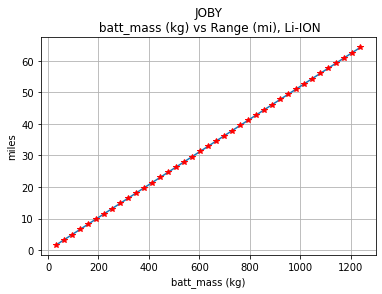

In [17]:
# ARCHER (unnamed), Mass fractions exploration

'''
Archer claims a 7k lb MTOW but only 60 miles range holding 5 passengers, the range either seems misquoted 
or the MTOW.  TO achieve such dismal performance from a heavy vehicle would require very low L/D ratios.
More data is needed.
'''

fractions = np.arange(.01, .40, .01)

e_m = .9
e_p = .85
ld = 6
e_batt = 225
payload = (100 * 5)

MTOW = 3175 #KG

w_test1 = MTOW * fractions[0]

ranges = []

for fraction in fractions:
    w_batt = MTOW * fraction
    w_empty = MTOW - payload - w_batt

    y = electric_range(e_m, e_p, ld, e_batt, w_batt, w_empty, payload)
    
    ranges.append((w_batt, y, (w_empty + w_batt + payload), fraction, (w_batt * e_batt) / 1000))

print(ranges[-1],"\n")

x_val  = [x[0] for x in ranges]
y_val  = [x[1] for x in ranges]
y2_val = [x[2] for x in ranges]

plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'*r')
plt.title('JOBY\n batt_mass (kg) vs Range (mi), Li-ION')
plt.ylabel('miles')
plt.xlabel('batt_mass (kg)')
plt.grid()

labels = ['batt_mass: ', 'Range (mi): ', 'Gross_wt (kg): ', 'Batt_mass_fraction: ', 'batt_kWh: ']

for x in range(len(labels)):
    print(labels[x],(f"{ranges[-1][x]:.2f}"))


(1061.19, 257.00580660550463, 2721.0, 0.39, 238.76775) 

batt_mass:  1061.19
Range (mi):  257.01
Gross_wt (kg):  2721.00
Batt_mass_fraction:  0.39
batt_kWh:  238.77


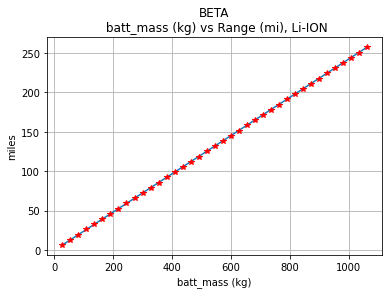

In [18]:
#  BETA Alia

'''
Beta Alia vehicle has some impressive stats for the lift + cruise design.
It is a very heavy flight vehcile at ~6k lbs.
It would need a very impressive L/D of 24+ to achieve the ranges spec'd out in the literature.
This may be possible the wing seems to be very highaspect ratio sized mainly for cruise as the stall speed in
airplane mode is nearly 90 knts as pointed out in one of their press releases.

It seems the primary design factor for these longer range inter-city EVOTLs will be maximizing L/D at all costs until better
battery chems are avail.
'''

fractions = np.arange(.01, .4, .01)

e_m = .9
e_p = .85
ld = 24
e_batt = 225
payload = (635)  #kg, cargo and optional pilot(?)

MTOW = 2721 #KG

w_test1 = MTOW * fractions[0]

ranges = []

for fraction in fractions:
    w_batt = MTOW * fraction
    w_empty = MTOW - payload - w_batt
    total_w = w_batt + w_empty + payload
    
    

    y = electric_range(e_m, e_p, ld, e_batt, w_batt, w_empty, payload)
    
    ranges.append((w_batt, y, (w_empty + w_batt + payload), fraction, (w_batt * e_batt) / 1000))

print(ranges[-1],"\n")

x_val  = [x[0] for x in ranges]
y_val  = [x[1] for x in ranges]
y2_val = [x[2] for x in ranges]

plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'*r')
plt.title('BETA\n batt_mass (kg) vs Range (mi), Li-ION')
plt.ylabel('miles')
plt.xlabel('batt_mass (kg)')
plt.grid()

labels = ['batt_mass: ', 'Range (mi): ', 'Gross_wt (kg): ', 'Batt_mass_fraction: ', 'batt_kWh: ']

for x in range(len(labels)):
    print(labels[x],(f"{ranges[-1][x]:.2f}"))


# Base Case Range Explorations vs various attributes

(0.12495, 0.5999999999999999, 3.0896629706943948, 0.38495, 0.49, 0.0162435)


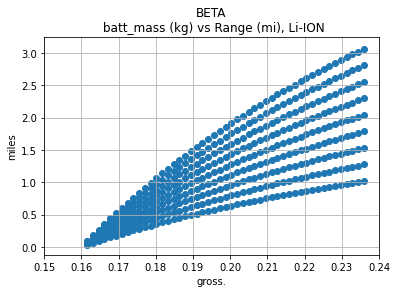

In [19]:
import matplotlib.cm as cm


b_fractions = np.arange(.01, .5, .01)
ld_ratios = np.arange(.2,.65,.05)
empty_weights = np.arange(.155,.340,.1)

e_m = .9
e_p = .85
# ld = 17
e_batt = 130
payload = .005  #kg

ranges = []


for e in empty_weights:
    w_empty = e
    
    for b in b_fractions:
        w_batt = w_empty * b
        
        for i in ld_ratios:
            ld = i

            y = electric_range(e_m, e_p, ld, e_batt, w_batt, w_empty, payload)
            ranges.append((w_batt, ld, y, (w_empty + w_batt + payload), b, (w_batt * e_batt) / 1000))
                
                
    
    





# y = electric_range(e_m, e_p, ld, e_batt, w_batt, w_empty, payload)


# for fraction in fractions:
#     w_batt = MTOW * fraction
#     w_empty = MTOW - payload - w_batt
#     total_w = w_batt + w_empty + payload



battery_mass   = [x[0] for x in ranges]
lift_to_drag   = [x[1] for x in ranges]
y              = [x[2] for x in ranges]
gross_weight   = [x[3] for x in ranges]
mass_fraction  = [x[4] for x in ranges]
kWh            = [x[5] for x in ranges]


indy = mass_fraction

plt.scatter(gross_weight,y)
# plt.plot(battery_mass,y,'*r')
plt.title('BETA\n batt_mass (kg) vs Range (mi), Li-ION')
plt.ylabel('miles')
plt.xlabel('gross.')
plt.grid()

plt.xlim(.15,.240)

print(ranges[-1])


Text(0.5, 0, 'gross')

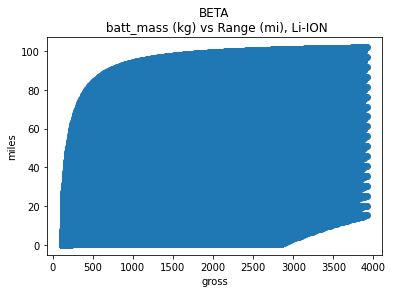

In [20]:
b_fractions = np.arange(.01, .41, .01)
ld_ratios = np.arange(3,21,1)
empty_weights = np.arange(20,(6000/2.2)+1, 5)

e_m = .9
e_p = .85
# ld = 17
e_batt = 150
payload = 100  #kg

ranges = []


for e in empty_weights:
    w_empty = e
    
    for b in b_fractions:
        w_batt = w_empty * b
        
        for i in ld_ratios:
            ld = i

            y = electric_range(e_m, e_p, ld, e_batt, w_batt, w_empty, payload)
            ranges.append((w_batt, ld, y, (w_empty + w_batt + payload), b, (w_batt * e_batt) / 1000))
                
                
    
    





# y = electric_range(e_m, e_p, ld, e_batt, w_batt, w_empty, payload)


# for fraction in fractions:
#     w_batt = MTOW * fraction
#     w_empty = MTOW - payload - w_batt
#     total_w = w_batt + w_empty + payload



battery_mass   = [x[0] for x in ranges]
lift_to_drag   = [x[1] for x in ranges]
y              = [x[2] for x in ranges]
gross_weight   = [x[3] for x in ranges]
mass_fraction  = [x[4] for x in ranges]
kWh            = [x[5] for x in ranges]


indy = gross_weight

plt.scatter(indy,y)
# plt.plot(battery_mass,y,'*r')
plt.title('BETA\n batt_mass (kg) vs Range (mi), Li-ION')
plt.ylabel('miles')
plt.xlabel('gross')
# plt.grid()

# plt.xlim(217,219)


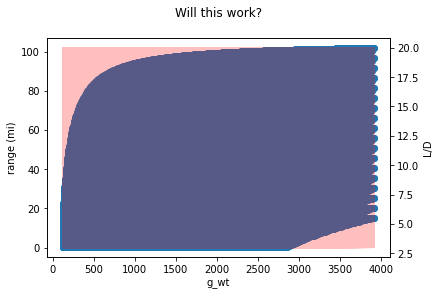

In [21]:
# plotting two metrics...testing


fig, ax = plt.subplots(constrained_layout=True)
x = gross_weight
y2 = lift_to_drag
y = y
ax.scatter(x, y)
ax.set_xlabel('g_wt')
ax.set_ylabel('range (mi)')
ax.set_title('Will this work?\n')

ax2 = ax.twinx()
ax2.plot(x, y2, 'r', alpha = .25)
ax2.set_ylabel("L/D")


# plt.xlim(200,225)

plt.show()

# Small Aircraft / Drones

## Microquad and MicroQuad Biplane Modelling

(0.0736, 3.138798808073394, 0.22999999999999998, 0.32, 0.0089792) 

batt_mass:  0.07
Range (mi):  3.14
Gross_wt (kg):  0.23
Batt_mass_fraction:  0.32
batt_kWh:  0.01


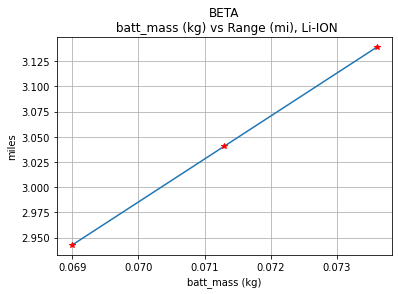

In [22]:
#  Carbon Microquad Bi-Plane

fractions = np.arange(.30, .32, .01)

e_m = .8  
e_p = .7
ld = .9  # (microquad L/D ratios, .75, are very poor averaged out across flight regime... see L/D notes below)
e_batt = 122  # small batteries have much lower energy density due to higher fractional weight of connectors and wiring (122)
payload = (43/1000)

MTOW = (230/1000) #KG

w_test1 = MTOW * fractions[0]

ranges = []

for fraction in fractions:
    w_batt = MTOW * fraction
    w_empty = MTOW - payload - w_batt
    total_w = w_batt + w_empty + payload
    
    

    y = electric_range(e_m, e_p, ld, e_batt, w_batt, w_empty, payload)
    
    ranges.append((w_batt, y, (w_empty + w_batt + payload), fraction, (w_batt * e_batt) / 1000))

print(ranges[-1],"\n")

x_val  = [x[0] for x in ranges]
y_val  = [x[1] for x in ranges]
y2_val = [x[2] for x in ranges]

plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'*r')
plt.title('BETA\n batt_mass (kg) vs Range (mi), Li-ION')
plt.ylabel('miles')
plt.xlabel('batt_mass (kg)')
plt.grid()

labels = ['batt_mass: ', 'Range (mi): ', 'Gross_wt (kg): ', 'Batt_mass_fraction: ', 'batt_kWh: ']

for x in range(len(labels)):
    print(labels[x],(f"{ranges[-1][x]:.2f}"))

In [23]:
small_batt = ranges[-1][4]
small_batt = small_batt * 1000

print("watt-hours: ", small_batt)

watt-hours:  8.9792


In [24]:
flight_power = 70  #(watts)
flight_speed = 18 #(m/s)

endurance_time = (small_batt / flight_power) * 60
distance = (endurance_time * 60) * flight_speed

print("endurance (mins): ", f"{endurance_time: .2f}")
print("   distance (km): ",f"{distance/1000: .2f}")
print("   distance (mi): ",f"{distance/1000*.626: .2f}")

endurance (mins):   7.70
   distance (km):   8.31
   distance (mi):   5.20


(0.16115999999999994, 9.291455508550454, 0.316, 0.5099999999999998, 0.033198959999999986) 

batt_mass:  0.16
Range (mi):  9.29
Gross_wt (kg):  0.32
Batt_mass_fraction:  0.51
batt_kWh:  0.03


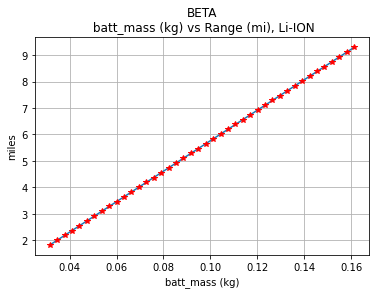

In [25]:
#  Carbon Microquad Bi-Plane with LI-ION pack 11.1V / 3,000 mah 161g

fractions = np.arange(.10, .52, .01)

e_m = .8
e_p = .7
ld = .99  # (microquad L/D ratios, .75, are very poor averaged out across flight regime)
e_batt = 206  # small batteries have much lower energy density due to higher fractional weight of connectors and wiring (122)
              # 206 for small 3000 mah Li-ION, 122 for small 850mah lipo
payload = .00001

MTOW = ((230 + 86) /1000) #KG

w_test1 = MTOW * fractions[0]

ranges = []

for fraction in fractions:
    w_batt = MTOW * fraction
    w_empty = MTOW - payload - w_batt
    total_w = w_batt + w_empty + payload
    
    

    y = electric_range(e_m, e_p, ld, e_batt, w_batt, w_empty, payload)
    
    ranges.append((w_batt, y, (w_empty + w_batt + payload), fraction, (w_batt * e_batt) / 1000))

print(ranges[-1],"\n")

battery_mass   = [x[0] for x in ranges]
y              = [x[1] for x in ranges]
gross_weight   = [x[2] for x in ranges]
mass_fraction  = [x[3] for x in ranges]
kWh            = [x[4] for x in ranges]


plt.plot(battery_mass,y)
plt.plot(battery_mass,y,'*r')
plt.title('BETA\n batt_mass (kg) vs Range (mi), Li-ION')
plt.ylabel('miles')
plt.xlabel('batt_mass (kg)')
plt.grid()

labels = ['batt_mass: ', 'Range (mi): ', 'Gross_wt (kg): ', 'Batt_mass_fraction: ', 'batt_kWh: ']

for x in range(len(labels)):
    print(labels[x],(f"{ranges[-1][x]:.2f}"))

In [26]:
small_batt = ranges[-1][4]
small_batt = small_batt * 1000

print("watt-hours: ", small_batt)

'''
90 /18

'''


flight_power = 60  #(watts)
flight_speed = 0  #(m/s)

endurance_time = (small_batt / flight_power) * 60
distance = (endurance_time * 60) * flight_speed

print("endurance (mins): ", f"{endurance_time: .2f}")
print("   distance (km): ",f"{distance/1000: .2f}")
print("   distance (mi): ",f"{distance/1000*.626: .2f}")

watt-hours:  33.198959999999985
endurance (mins):   33.20
   distance (km):   0.00
   distance (mi):   0.00


In [27]:
# Multicopter Equivalent Lift to Drag Calculations, ref paper:  need to find link***



mass = ranges[-1][2]    #kg
power = 70 / 1000       #kW
speed = flight_speed    #m/s

equiv_l_to_d = (((mass * speed) / power) / 100)

print("  mass: ", f"{mass: .2f}", "kg")
print(" speed: ", f"{speed: .2f}", "m/s")
print("L/D,eq: ", f"{equiv_l_to_d: .2f}")

  mass:   0.32 kg
 speed:   0.00 m/s
L/D,eq:   0.00


### Different wing geometries no_wing, foam core 33 cm span, foam core 17 cm span

In [28]:
foam_33 = [
    (0, 65),    
    (6.5, 42),
    (9.5, 52)
]

no_wing = [
    (0, 65),
    (6.5, 55),
    (9.5, 57.5),
    (19, 75),
    (22.5, 85)
]

foam_17 = [
    (0, 65),    
    (6.5, 50),
    (9.5, 51.5),
    (15, 57.5),
    (17.5, 65),
    (19, 75),
    (22.5, 88)
]

mass = .230

In [29]:
def multi_specs(mass, power, speed, kwh):
    endurance_time = ((kwh) / power) * 60 
    distance = ((endurance_time * 60) * speed) / 1000
    equiv_l_to_d = (((mass * speed) / power) / 100)
    
    return [endurance_time, distance, equiv_l_to_d]
    
    

In [30]:
layout_list = [no_wing, foam_17, foam_33]
max_list = []
lower_bound = -10000



for j in layout_list:
    print('\n')
    for i in j:
        p = multi_specs(.230 + .086 + .161, i[1] / 1000, i[0], (.0333 * .8))
        # 850mah LIPO is .00969 kWh, 3k mah LI-ION is .0333
        
        if p[0] > lower_bound:
            lower_bound = p[0]
            max = (i,p)
        else:
            pass
        
        print(i, p)



(0, 65) [24.590769230769236, 0.0, 0.0]
(6.5, 55) [29.061818181818186, 11.334109090909093, 0.5637272727272726]
(9.5, 57.5) [27.79826086956522, 15.845008695652174, 0.788086956521739]
(19, 75) [21.312000000000005, 24.295680000000004, 1.2084]
(22.5, 85) [18.804705882352945, 25.386352941176476, 1.2626470588235292]


(0, 65) [24.590769230769236, 0.0, 0.0]
(6.5, 50) [31.968000000000004, 12.46752, 0.6200999999999999]
(9.5, 51.5) [31.0368932038835, 17.691029126213593, 0.8799029126213591]
(15, 57.5) [27.79826086956522, 25.018434782608697, 1.2443478260869565]
(17.5, 65) [24.590769230769236, 25.820307692307697, 1.2842307692307693]
(19, 75) [21.312000000000005, 24.295680000000004, 1.2084]
(22.5, 88) [18.163636363636368, 24.520909090909097, 1.2196022727272728]


(0, 65) [24.590769230769236, 0.0, 0.0]
(6.5, 42) [38.057142857142864, 14.842285714285717, 0.7382142857142857]
(9.5, 52) [30.738461538461543, 17.52092307692308, 0.8714423076923076]


In [31]:
max

((6.5, 42), [38.057142857142864, 14.842285714285717, 0.7382142857142857])

## Delftacopter, hybrid single main rotor + anti-torque motors, biplane flying wing (1.54m x .65m)

In [32]:

#  https://mavlab.tudelft.nl/delftacopter/


d_copter = [
    (0, 280),    
    (18, 230),
    (23.15, 300),
    (25.72, 400)
]

In [33]:
output_list = []
lower_bound = -10000



for i in d_copter:
    p = multi_specs(4.5, i[1] / 1000, i[0], (.225 * .8))
    # 10k mah battery, 225 Wh
    
    if p[0] > lower_bound:
        lower_bound = p[0]
        max = (i,p)
    else:
        pass
    output_list.append(p)
    print(i, p)

#  [endurance_time, distance, equiv_l_to_d]

(0, 280) [38.57142857142858, 0.0, 0.0]
(18, 230) [46.95652173913044, 50.713043478260865, 3.5217391304347827]
(23.15, 300) [36.00000000000001, 50.004000000000005, 3.4725]
(25.72, 400) [27.0, 41.6664, 2.8934999999999995]


In [34]:
df = pd.DataFrame(d_copter, columns=['speed','watts'])

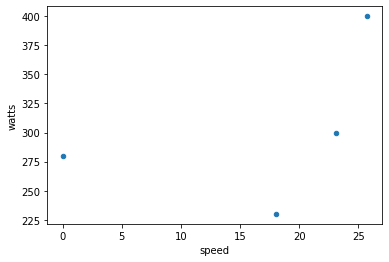

In [35]:
df.plot.scatter(x='speed', y='watts')

In [36]:
output_list

[[38.57142857142858, 0.0, 0.0],
 [46.95652173913044, 50.713043478260865, 3.5217391304347827],
 [36.00000000000001, 50.004000000000005, 3.4725],
 [27.0, 41.6664, 2.8934999999999995]]

In [37]:
df_output = pd.DataFrame(output_list, columns=['endurance(mins)', 'range', 'l/d'])
df_output

,endurance(mins),range,l/d
0,38.571429,0.000000,0.000000
1,46.956522,50.713043,3.521739
2,36.000000,50.004000,3.472500
3,27.000000,41.666400,2.893500


In [38]:
result = pd.concat([df, df_output], axis=1)
result

,speed,watts,endurance(mins),range,l/d
0,0.00,280,38.571429,0.000000,0.000000
1,18.00,230,46.956522,50.713043,3.521739
2,23.15,300,36.000000,50.004000,3.472500
3,25.72,400,27.000000,41.666400,2.893500


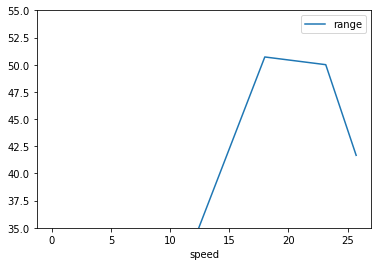

In [39]:
result.plot(x='speed', y='range', ylim = (35,55))

## Google Wing

(2.112, 18.374858617923042, 6.312, 0.33, 0.3168) 

batt_mass:  2.11
Range (mi):  18.37
Gross_wt (kg):  6.31
Batt_mass_fraction:  0.33
batt_kWh:  0.32


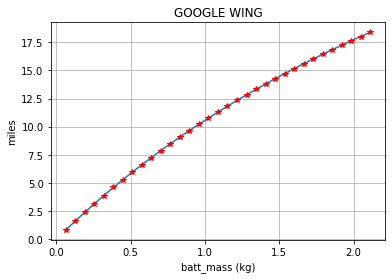

In [40]:
'''
have mass and range radius need battery weight
flight profile is more complex however as the mass
changes as the payload is dropped off
could run tests to calculate for that.

Although if there was an issue or cancelled order the craft would have to bring the payload back so the real
no hover for delivery range is probably closer to 20 miles, total guess.  By playing with this number 
it is clear if google could design a better L/D wing/structure they could vastly improve their range.

We can see that the griflion has massive range comparatively although the missions are very different and 
Wing is optimised to survive engine out in hover
with its 12 lift motors where Griflion only has 4,
plus wing has a much longer hover duration as it winch lowers payload to ground.

It is interesting to see the differences however in range being that both systems have roughly the same MTOW.

should look up various qumultirotors to see 
how much power is normally needed to hover what kind of mass
see if there is an easily linear relationship
--> answer seems to be about 300-350 W/kg

'''


fractions = np.arange(.01, .99, .01)

e_m = .9
e_p = .85
ld = 3
e_batt = 150
payload = (1.2)

MTOW = (6.4) #5,000 lbs to KG

w_test1 = MTOW * fractions[0]

ranges = []

for fraction in fractions:
    w_batt = MTOW * fraction
    w_empty = 3.0  #wing weight

    if w_empty + w_batt + payload > (MTOW * .99):
        break
    else:
        y = electric_range(e_m, e_p, ld, e_batt, w_batt, w_empty, payload)
    
        ranges.append((w_batt, y, (w_empty + w_batt + payload), fraction, (w_batt * e_batt) / 1000))

print(ranges[-1],"\n")

x_val  = [x[0] for x in ranges]
y_val  = [x[1] for x in ranges]
y2_val = [x[2] for x in ranges]

plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'*r')
plt.title('GOOGLE WING')
plt.ylabel('miles')
plt.xlabel('batt_mass (kg)')
plt.grid()

labels = ['batt_mass: ', 'Range (mi): ', 'Gross_wt (kg): ', 'Batt_mass_fraction: ', 'batt_kWh: ']

for x in range(len(labels)):
    print(labels[x],(f"{ranges[-1][x]:.2f}"))

In [41]:
# run different L/D ratios for Google Wing

## Griflion M8, lift + cruise mapping drone

(4.3199999999999985, 111.00852903646438, 11.819999999999999, 0.3599999999999999, 0.8639999999999997) 

batt_mass:  4.32
Range (mi):  111.01
Gross_wt (kg):  11.82
Batt_mass_fraction:  0.36
batt_kWh:  0.86


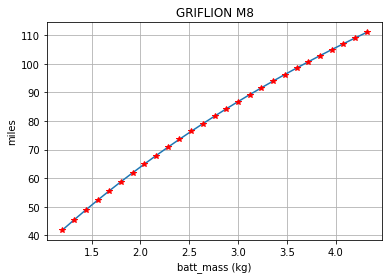

In [42]:
#  MAPPING DRONE:  https://www.mmcuav.com/portfolio-items/griflion-m8/

'''
Could not achieve published ranges at 1kg payload mass, normal for most firms 
to display a maximum range at reduced payload fractions.

To get much higher ranges L/D ratios would become unreasonably high for such a small wingspan
normally, the maximum at this scale is around ~20:1.  This information is 'common knowledge'
in the 4m Radio Controlled sailplane community.

Although at higher wing loadings potentially high L/D ratios might be achievable at much higher
cruising speeds
'''


fractions = np.arange(.1, .99, .01)

e_m = .8  
e_p = .7
ld = 17  # L/D is enhanced on this craft by very high aspect ratio wings, payload is less than Google wing, diff mission though 
e_batt = 200  # Li-ion chems
payload = (2)

MTOW = (12) #KG

w_test1 = MTOW * fractions[0]

ranges = []

for fraction in fractions:
    w_batt = MTOW * fraction
    w_empty = 5.5  # no batteries

    if w_empty + w_batt + payload > (MTOW * .99):
        break
    else:
        y = electric_range(e_m, e_p, ld, e_batt, w_batt, w_empty, payload)
    
        ranges.append((w_batt, y, (w_empty + w_batt + payload), fraction, (w_batt * e_batt) / 1000))

print(ranges[-1],"\n")

x_val  = [x[0] for x in ranges]
y_val  = [x[1] for x in ranges]
y2_val = [x[2] for x in ranges]

plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'*r')
plt.title('GRIFLION M8')
plt.ylabel('miles')
plt.xlabel('batt_mass (kg)')
plt.grid()

labels = ['batt_mass: ', 'Range (mi): ', 'Gross_wt (kg): ', 'Batt_mass_fraction: ', 'batt_kWh: ']

for x in range(len(labels)):
    print(labels[x],(f"{ranges[-1][x]:.2f}"))

### Griflion without Lift Motors and Arms

Lift System Removal Mass Savings:  1.65  kg

(4.32, 151.78677924819348, 10.17, 0.9799999999999995, 0.864) 

batt_mass:  4.32
Range (mi):  151.79
Gross_wt (kg):  10.17
Batt_mass_fraction:  0.98
batt_kWh:  0.86


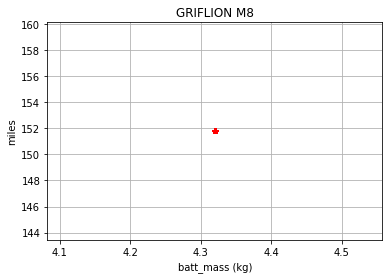

In [43]:
'''
Keeping same gross liftoff weight and batt_mass - lift motor mass and arm mass.
MTOW could potentially be increased with rolling takeoffs

Lift Motor:  .225 kg x 4
Arm(s) mass:  .4 kg

Looks like it extends the range by ~22%
'''


fractions = np.arange(.1, .99, .01)

e_m = .8  
e_p = .7
ld = 20  # L/D is enhanced on this craft by very high aspect ratio wings, payload is less than Google wing, diff mission though 
e_batt = 200  # Li-ion chems
payload = (2)

MTOW = (12) #KG

arm_weight = .75  #KG
lift_motor_weight = .225

print("Lift System Removal Mass Savings: ", arm_weight + (lift_motor_weight * 4), " kg\n")

ranges = []

for fraction in fractions:
    w_batt = MTOW * fraction
    w_batt = 4.32
    w_empty = 5.5 - arm_weight - (lift_motor_weight * 4)


    if w_empty + w_batt + payload > (MTOW * .99):
        break
    else:
        y = electric_range(e_m, e_p, ld, e_batt, w_batt, w_empty, payload)
    
        ranges.append((w_batt, y, (w_empty + w_batt + payload), fraction, (w_batt * e_batt) / 1000))

print(ranges[-1],"\n")

x_val  = [x[0] for x in ranges]
y_val  = [x[1] for x in ranges]
y2_val = [x[2] for x in ranges]

plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'*r')
plt.title('GRIFLION M8')
plt.ylabel('miles')
plt.xlabel('batt_mass (kg)')
plt.grid()

labels = ['batt_mass: ', 'Range (mi): ', 'Gross_wt (kg): ', 'Batt_mass_fraction: ', 'batt_kWh: ']

for x in range(len(labels)):
    print(labels[x],(f"{ranges[-1][x]:.2f}"))

In [44]:
# Range extension without lift motors and arms

(151-111) / 111

0.36036036036036034

# "Smart Rocks" (guided mortars)

In [45]:
'''
Could we just "smart mortar" payloads around a city instead of flying them around or some type of catapult.
81mm mortar can throw 10 lb mortars 5k meters 

for example:
  ACERM 81mm round has L/D ~6:1 to 9:1.  So by lofting to altitude many destinations could be within the glide radius.  
  The vehicle could potentially be somewhat disposable or left curbside like rental scooters for later pickup
  by third parties.  Wings and control surfaces would fold away into a more robust, roughly cylindrical-like shape.
  High-G propellent launches could be mitigated by sled, cable, or alternative lower acceleration methods.


"the maximum L/D is not dependent on weight or wing loading, but with 
greater wing loading the maximum L/D occurs at a faster airspeed."


'''
print('')